In [1]:
import pandas as pd
import seaborn as sns
import BabsonAnalytics
import numpy as np
%matplotlib inline

# Load

In [2]:
df = pd.read_csv('../data/UniversalBank.csv')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Manage

In [3]:
cat_cols = ['ZIP Code','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']
for col in cat_cols:
    df[col] = df[col].astype("category")
    
df.drop('ID',axis=1,inplace=True)

df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Partition

In [4]:
train = df.sample(frac=0.8)
test = df.drop(train.index)

trainTarget = train.pop('Personal Loan')
testTarget = test.pop('Personal Loan')

# Build

In [5]:
from sklearn import tree
model = tree.DecisionTreeClassifier(min_samples_split=250,min_samples_leaf=250,max_leaf_nodes=7)
model.fit(train,trainTarget)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=7, min_impurity_split=1e-07,
            min_samples_leaf=250, min_samples_split=250,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Predict

In [6]:
predictions = model.predict(test)

# Evaluate

In [7]:
error_rate = sum(predictions != testTarget)/len(predictions)
bench_rate = BabsonAnalytics.benchmarkErrorRate(trainTarget,testTarget)

print('Error rate: ', error_rate)
print('Benchmark: ',bench_rate)

Error rate:  0.035
Benchmark:  0.105


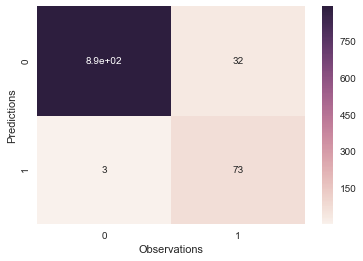

In [8]:
cm = BabsonAnalytics.confusionMatrix(predictions, testTarget)
sns.heatmap(cm,annot=True)

# Cross validation

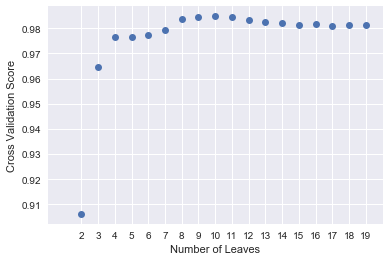

In [33]:
model = tree.DecisionTreeClassifier()
BabsonAnalytics.crossValTree(model,train,trainTarget)

# Best tree

In [32]:
model = tree.DecisionTreeClassifier(max_leaf_nodes=4)
model.fit(train,trainTarget)
predictions = model.predict(test)
error_rate = sum(predictions != testTarget)/len(predictions)
bench_rate = BabsonAnalytics.benchmarkErrorRate(trainTarget,testTarget)

print('Error rate: ', error_rate)
print('Benchmark: ',bench_rate)

Error rate:  0.017
Benchmark:  0.105
